<a id='start'></a>
# Pandas DataFrame

In questo notebook vengono spiegati i principali metodi per raccogliere ed effettuare una prima manipolazione sui dati. <br>
La libreria più usata per effettuare queste operazioni principali è **Pandas**. <br>
<br>
Il notebook è suddiviso nelle seguenti sezioni:<br>
- [DataFrame e Series](#section1)<a href='#section1'></a>; <br>
- [Importare i dati dall'esterno](#section2)<a href='#section2'></a>; <br>
- [Selezionare i dati del dataset](#section3)<a href='#section3'></a>; <br>
    - [Index - based Selection](#section4)<a href='#section4'></a><br>
    - [Label - based Selection](#section5)<a href='#section5'></a> <br>
    - [Conditional Selection](#section6)<a href='#section6'></a>
    - [ROOT](#section7)<a href='#section7'></a>

<a id='section1'></a>
## DataFrame e Series

Introduciamo la libreria **Pandas**, utilizzata per creare e gestire gli oggetti: **Dataframe**.<br>

Gli oggetti *Series* e *Dataframe* possono essere importati da file (csv, xls, html, ..) oppure creati manualmente. <br>

Importiamo inizialmente la libreria Pandas

In [38]:
import pandas as pd

Un **DataFrame** è una tabella che contiene un array di singole voci, ognuna delle quali ha un certo valore. Ogni voce corrisponde ad una riga (o record) e ad una colonna.

In [2]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})

,Yes,No
0,50,131
1,21,2


Un DataFrame può contenere anche caratteri stringa e non solo valori numerici

In [40]:
pd.DataFrame({'Audi': [2, 1], 'Mercedes': ['Peggiore', 'Migliore']})

,Audi,Mercedes
0,2,Peggiore
1,1,Migliore


Le righe di un DataFrame prendono il nome di **Index** ed è possibile assegnargli un valore tramite il seguente codice:

In [41]:
pd.DataFrame({'Audi': ['Migliore', 'Peggiore'], 'Mercedes':['Peggiore', 'Migliore']}, index = ['Utilitaria', 'Sportiva'])

,Audi,Mercedes
Utilitaria,Migliore,Peggiore
Sportiva,Peggiore,Migliore


Una **Series**, è una sequenza di valori di dati. Se un DataFrame è una tabella, una serie è una lista.

In [5]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

È possibile assegnare dei valori alle righe di una Series allo stesso modo di prima, utilizzando un parametro indice. <br>
Inoltre, una Series non ha un nome di colonna, ma ha solo un nome complessivo

In [6]:
pd.Series([300, 450, 400], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product X')

2015 Sales    300
2016 Sales    450
2017 Sales    400
Name: Product X, dtype: int64

<a id='section2'></a>
## Importare i dati dall'esterno

In questa sezione del notebook ci occupiamo di come importare i dati da risorse esterne (csv, excel e html) grazie alla libreria Pandas.

### Importare dati da un csv

Il metodo da utilizzare per importare i dati da un csv con la libreria Pandas è __[read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)__. <br>
Ci sono molti parametri per il metodo *read_csv*, i più importanti sono:
- sep
- delimeter
- header
- index_col
- skiprows
- na_values <br>
...

In [42]:
dataset = pd.read_csv("data/dataset.csv", index_col = 0)
dataset

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0
6,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,S,0
7,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1


In [8]:
# Il metodo .head() permette di vedere le prime righe (di default le prime 5) di un DataFrame o di una Series
dataset.head()

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0


In [9]:
# il metodo .tail() permette di vedere le ultime righe (di default le prime 5) di un DataFrame o di una Series
dataset.tail()

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
16,3,"Rice, Master. Eugene",male,2.0,29.125,Q,0
17,2,"Williams, Mr. Charles Eugene",male,NaN,13.000,S,1
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,18.000,S,0
19,3,"Masselmani, Mrs. Fatima",female,NaN,7.225,C,1
20,2,"Fynney, Mr. Joseph J",male,35.0,26.000,S,0


### Importare dati da un file excel

Il metodo da utilizzare per importare i dati da un file excel con la libreria Pandas è __[read_excel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html)__. <br>
In questo caso sarà necessario indicare in quale sheet del file excel si trova il dataframe che vogliamo importare utilizzando il parametro *sheet_name*.

In [10]:
dataset = pd.read_excel("data/dataset_excel_workbook.xlsx", engine='openpyxl', sheet_name='dataset', index_col=0)
dataset

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0
6,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,S,0
7,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1


### Importare dati da un sito web

Il metodo da utilizzare per importare una tabella da un sito web con la libreria Pandas è __[read_html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html#pandas.read_html)__. <br>


I parametri più importanti da considerare nel momento in cui si fa l'import sono i seguenti: <br>
- **skiprows** = indica il numero di righe da saltare nell'importazione; <br>
- **header** = indica la riga da utilizzare per creare le intestazioni delle colonne.

In [43]:
classifica_serie_a = pd.read_html(io="http://www.legaseriea.it/it/serie-a/classifica", skiprows=1, header=0)
classifica_serie_a

[             SQUADRE  PUNTI   G   V   N   P  G.1  V.1  N.1  P.1  G.2  V.2  \
 0           1  Inter     59  25  18   5   2   12   10    1    1   13    8   
 1           2  Milan     53  25  16   5   4   13    6    4    3   12   10   
 2        3  Juventus     49  24  14   7   3   12    9    2    1   12    5   
 3        4  Atalanta     49  25  14   7   4   13    7    3    3   12    7   
 4            5  Roma     47  25  14   5   6   13    9    3    1   12    5   
 5          6  Napoli     44  24  14   2   8   12    8    1    3   12    6   
 6           7  Lazio     43  24  13   4   7   12    7    2    3   12    6   
 7   8  Hellas Verona     38  25  10   8   7   12    6    3    3   13    4   
 8        9  Sassuolo     36  24   9   9   6   12    3    6    3   12    6   
 9      10  Sampdoria     31  25   9   4  12   12    5    1    6   13    4   
 10       11  Udinese     29  25   7   8  10   12    4    3    5   13    3   
 11       12  Bologna     28  25   7   7  11   12    5    3    4

La funzione *read_html* ritorna come oggetto una *lista di DataFrame*. <br>
Possiamo a questo punto associare la lista di Dataframe identificata dall'elemento 0 dell'oggetto ottenuto da *read_html*.

In [44]:
serie_a = classifica_serie_a[0]
serie_a.head()

,SQUADRE,PUNTI,G,V,N,P,G.1,V.1,N.1,P.1,G.2,V.2,N.2,P.2,F,S
0,1 Inter,59,25,18,5,2,12,10,1,1,13,8,4,1,62,25
1,2 Milan,53,25,16,5,4,13,6,4,3,12,10,1,1,48,30
2,3 Juventus,49,24,14,7,3,12,9,2,1,12,5,5,2,48,20
3,4 Atalanta,49,25,14,7,4,13,7,3,3,12,7,4,1,60,32
4,5 Roma,47,25,14,5,6,13,9,3,1,12,5,2,5,50,38


È possibile ottenere i nomi delle colonne che formano un Dataframe o una Series attraverso l'attributo **.columns**

In [45]:
serie_a.columns

Index(['SQUADRE', 'PUNTI', 'G', 'V', 'N', 'P', 'G.1', 'V.1', 'N.1', 'P.1',
       'G.2', 'V.2', 'N.2', 'P.2', 'F', 'S'],
      dtype='object')

In [14]:
type(serie_a)

pandas.core.frame.DataFrame

In [15]:
serie_a

,SQUADRE,PUNTI,G,V,N,P,G.1,V.1,N.1,P.1,G.2,V.2,N.2,P.2,F,S
0,1 Inter,59,25,18,5,2,12,10,1,1,13,8,4,1,62,25
1,2 Milan,53,25,16,5,4,13,6,4,3,12,10,1,1,48,30
2,3 Juventus,49,24,14,7,3,12,9,2,1,12,5,5,2,48,20
3,4 Atalanta,49,25,14,7,4,13,7,3,3,12,7,4,1,60,32
4,5 Roma,47,25,14,5,6,13,9,3,1,12,5,2,5,50,38
5,6 Napoli,44,24,14,2,8,12,8,1,3,12,6,1,5,52,28
6,7 Lazio,43,24,13,4,7,12,7,2,3,12,6,2,4,38,32
7,8 Hellas Verona,38,25,10,8,7,12,6,3,3,13,4,5,4,34,27
8,9 Sassuolo,36,24,9,9,6,12,3,6,3,12,6,3,3,40,37
9,10 Sampdoria,31,25,9,4,12,12,5,1,6,13,4,3,6,34,37


<a id='section3'></a>
## Selezionare i dati del dataset

In questa sezione impareremo i principali metodi per selezionare le colonne e le righe di un dataset, identificato sottoforma di DataFrame o Series.

Prima di continuare è necessario precisare che la libreria **Pandas** _non_ utilizza la denominazione, che viene usata comunemente per individuare gli assi di un database, ovvero *dimension* e *feature*. <br>
La libreria Pandas indica le dimensioni di una matrice, con il termine **axes**, ovvero utilizza il parametro **(axis = 0)** per indicare le righe di un dataset ed il parametro **(axis = 1)** per indicare le colonne di un dataset.

<img src="img/axis_Pandas.jpg">

In [16]:
# Rinomiamo il dataset importato precedentemente tramite file excel
titanic = dataset
titanic.head()

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0


In [46]:
# Selezioniamo la colonna Age del dataset titanic
titanic['Age'] # è possibile usare anche titanic.Age
titanic.Age

1     38.0
2     26.0
3     35.0
4     35.0
5     35.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17    35.0
18    31.0
19    35.0
20    35.0
Name: Age, dtype: float64

Nella cella precedente abbiamo selezionato una colonna da un DataFrame ed è stata estratta assegnandole il formato **Series**. <br>
Abbiamo indicato due metodi per estrarre una colonna da un DataFrame, nessuno dei due è il migliore ma qualora il nome della colonna avesse uno spazio, ad esempio supponiamo fosse "Age Female", in quel caso dovremmo usare la notazione con le parentesi quadre.

In [47]:
# Selezioniamo ora la prima riga della colonna Age
titanic['Age'][1]

38.0

Pandas utilizza due paradigmi per selezionare i dati: <br>
- Index-based: ovvero basandosi sulla posizione numerica dei dati; <br>
- Label-based: ovvero basandosi sul valore di un indice dei dati.

<a id='section4'></a>
### Index-Based Selection

Il codice che si utilizza per effettuare una *index-based selection* è **iloc**.<br>
Ad esempio, selezioniamo la prima riga del dataset sul titanic:

In [48]:
titanic.iloc[0]

Pclass                                                      1
Name        Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                    female
Age                                                        38
Fare                                                  71.2833
Embarked                                                    C
Survived                                                    1
Name: 1, dtype: object

Sia il metodo **iloc** che **loc** (che vedremo dopo) sono *row-first, column-second* ovvero considerano come primo input il valore della riga e come secondo quello della colonna. Questo funzionamento è opposto al tradizionale comportamento di Python, che è *column-first, row-second*. <br>
Infatti poche righe sopra, prima di introdurre *iloc* e *loc* abbiamo usato il codice "titanic['Age'][1]", ovvero dataset[colonna][riga].

Per ottenere la colonna desiderata con iloc dobbiamo utilizzare la seguente sintassi:

In [50]:
# Stampo TUTTE le righe della colonna dei nomi
titanic.iloc[:,1]

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles Eugene
18    Vander Planke, Mrs. Julius (Emelia Maria V

In [51]:
# Stampo le prime 3 righe della colonna dei nomi
titanic.iloc[:3,1]

1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
Name: Name, dtype: object

In [22]:
# Stampo le righe che mi interessano della colonna dei nomi
# In questo caso utilizzo una lista per indicare le righe che mi interessano
titanic.iloc[[1,2,3,5,7],1]

2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
6                              McCarthy, Mr. Timothy J
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Name: Name, dtype: object

<a id='section5'></a>
### Label-Based Selection

Il codice che si utilizza per effettuare una *label-based selection* è **loc**.<br>
Per ottenere il primo record del campo "Name" del dataset sul titanic dobbiamo utilizzare la seguente sintassi:

In [23]:
titanic.loc[1, 'Name']

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [24]:
titanic.loc[2, ['Name', 'Age', 'Pclass']]

Name      Heikkinen, Miss. Laina
Age                           26
Pclass                         3
Name: 2, dtype: object

Quando si sceglie o si passa da *loc* a *iloc*, c'è una **differenza** che è importante tenere a mente, cioè che **i due metodi utilizzano schemi di indicizzazione leggermente diversi**.<br>

**iloc** utilizza lo schema di indicizzazione Python stdlib: dove **il primo elemento del range è incluso e l'ultimo escluso.** Quindi iloc[0:10] selezionerà le voci 0,.....,9. <br>
**loc**, nel frattempo, **indicizza in modo inclusivo.** Così loc[0:10] selezionerà le voci 0,.....,10.

Supponiamo di avere un DataFrame con un semplice elenco numerico, ad esempio 0,......1000. In questo caso df.iloc[0:1000] restituirà 1000 voci, mentre df.loc[0:1000] ne restituirà 1001! Per ottenere 1000 elementi usando loc, dovremo utilizzare df.loc[0:999].


<a id='section6'></a>
### Conditional Selection

Durante le nostre analisi potremo aver bisogno di selezionare parti di un dataset sulla base dei valori che possono assumere i campi. Ovvero voler porre delle condizioni alle nostre selezioni.

Supponiamo di voler selezionare dal dataset del titanic solo le donne; iniziamo chiedendoci quali sono le righe che hanno come campo della colonna "Sex" il valore di "female":

In [52]:
titanic.Sex

1     female
2     female
3     female
4       male
5       male
6       male
7       male
8     female
9     female
10    female
11    female
12      male
13      male
14    female
15    female
16      male
17      male
18    female
19    female
20      male
Name: Sex, dtype: object

In [53]:
titanic.Sex == "female"

1      True
2      True
3      True
4     False
5     False
6     False
7     False
8      True
9      True
10     True
11     True
12    False
13    False
14     True
15     True
16    False
17    False
18     True
19     True
20    False
Name: Sex, dtype: bool

Abbiamo ottenuto una colonna di True/False che possiamo utilizzare con l'operatore *loc* per selezionare nel dataset i campi riferiti solo alle donne:

In [54]:
titanic.loc[titanic.Sex == "female"]

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1
11,1,"Bonnell, Miss. Elizabeth",female,58.0,26.5500,S,1
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,7.8542,S,0
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,16.0000,S,1
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,18.0000,S,0


Supponiamo ora di voler selezionare le donne che hanno meno di 30 anni:

In [57]:
# utilizziamo l'operatore logico &
titanic.loc[(titanic.Sex == "female") & (titanic.Age < 30)]

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,7.8542,S,0


Supponiamo di voler selezionare le femmine oppure tutti quelli che hanno meno di 30 anni, in questo caso sarà necessario utilizzare l'operatore **or**: |

In [59]:
titanic.loc[(titanic.Sex == "female") | (titanic.Age < 10)]

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
7,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1
11,1,"Bonnell, Miss. Elizabeth",female,58.0,26.5500,S,1
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,7.8542,S,0
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,16.0000,S,1


Pandas ha dei *conditional selector* pre-costruiti che possono essere utili durante le analisi:<br>
- **isin**: permette di selezionare i dati il cui valore è in una lista di valori; <br>
- **isnull** (ed il suo complementare **notnull**: permette di selezionare i valori che sono o meno nulli (NaN). 

Supponiamo di voler selezionare solo le persone che appartengono alla seconda e terza classe (campo Pclass).

In [29]:
titanic.loc[titanic.Pclass.isin([2,3])]

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0
7,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1
12,3,"Saundercock, Mr. William Henry",male,20.0,8.0500,S,0
13,3,"Andersson, Mr. Anders Johan",male,39.0,31.2750,S,0
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,7.8542,S,0


Supponiamo di voler selezionare tutti i passeggeri che hanno età nulla:

In [30]:
titanic.loc[titanic.Age.isnull()]

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
5,3,"Moran, Mr. James",male,NaN,8.4583,Q,0
17,2,"Williams, Mr. Charles Eugene",male,NaN,13.0000,S,1
19,3,"Masselmani, Mrs. Fatima",female,NaN,7.2250,C,1


A questo punto possiamo anche associare un valore ad un campo una volta effettuata una selezione. <br>
Assegniamo a tutte le persone che hanno un valore di età nullo, l'età di 35 anni.

In [31]:
titanic.loc[titanic.Age.isnull(), 'Age'] = 35
titanic

,Pclass,Name,Sex,Age,Fare,Embarked,Survived
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
5,3,"Moran, Mr. James",male,35.0,8.4583,Q,0
6,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,S,0
7,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,1
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,1


<a id='section7'></a>
### ROOT

Con python è anche possibile leggere dei files di ROOT. ROOT è un framework per l'elaborazione dati, nato al CERN, al centro della ricerca sulla fisica delle alte energie. Ogni giorno, migliaia di fisici utilizzano le applicazioni ROOT per analizzare i propri dati o per eseguire simulazioni.

Proviamo ad aprire un dataset di ROOT, convertiamolo in un dataset e ripuliamo i valori che hanno valore per il campo `f_mass_jj` uguale a `-999`.

In [61]:
import uproot

treename = 'HZZ4LeptonsAnalysisReduced'
filename ='data/ntuple_4mu_bkg.root'

upfile = uproot.open(filename)
params = upfile[treename].arrays() # dictionary of NumPy arrays

VARS = ['f_massjj']

upfile = uproot.open(filename)
params = upfile[treename].arrays(VARS)

df = pd.DataFrame(params.tolist())
print (df)

          f_massjj
0      -999.000000
1      -999.000000
2      -999.000000
3      1353.025513
4      -999.000000
...            ...
58102  -999.000000
58103  -999.000000
58104  -999.000000
58105  -999.000000
58106  -999.000000

[58107 rows x 1 columns]


In [33]:
df.dtypes

df_cleaned = df.loc[df['f_massjj'] != -999]
df_cleaned

,f_massjj
3,1353.025513
7,111.907364
28,147.763611
31,124.071999
32,777.092590
...,...
58056,114.257278
58057,106.195534
58060,53.661579
58062,71.162025


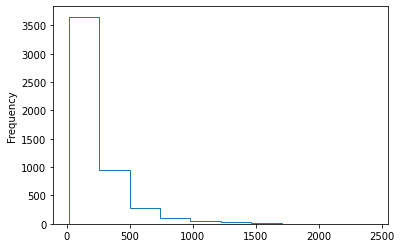

In [34]:
ax = df_cleaned['f_massjj'].plot.hist(bins=10, label='f_massjj', histtype='step')

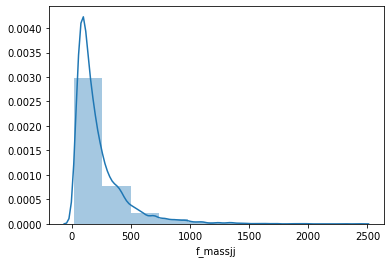

In [35]:
import seaborn as sns
ax = sns.distplot(df_cleaned['f_massjj'], bins=10, kde=True)

Di seguito alcuni link utili: <br>
- <a href='https://pandas.pydata.org/pandas-docs/stable/indexing.html'>Pandas - Indexing and Selecting Data</a><br>
- <a href='https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html'>Pandas - Comparison with Sql</a><br>

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>